<a href="https://colab.research.google.com/github/fenssi/customer-segmentation-analysis/blob/main/Customer%20Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
sns.set_theme(style ='whitegrid')
pd.set_option('display.float_format', lambda x : '%.0f' % x)

# Import

In [ ]:
# use buyer_id

df = 'https://drive.google.com/file/d/12NmEOiwQ1i1Y-nrs4wX1Ayaw98Sr3Ai4/view?usp=sharing'

buyer = 'https://drive.google.com/uc?id='+ df.split('/')[-2]

df = pd.read_csv(buyer, on_bad_lines='skip', sep=',')
df.head()

,order_id,seller_id,buyer_id,transaction_date,order_status,payment_group,payment_method,total_project_value,revenue,seller_category,main_cat,price_per_item,product_id,user_id,quantity,free_shipping,price_total
0,22,631a6830cdc00cf233d43570,631a5ca28755a8a989601054,2022-07-05,Selesai,Direct,mps-qris,119275,894,Mikro,Makanan & Minuman,66250,631d5532459015fcda6a0d88,631a6830cdc00cf233d43570,1,False,66250
1,22,631a6830cdc00cf233d43570,631a5ca28755a8a989601054,2022-07-05,Selesai,Direct,mps-qris,119275,894,Mikro,Makanan & Minuman,22500,631d5532459015fcda6a0d66,631a6830cdc00cf233d43570,1,False,22500
2,38,631a96df7476cace45462f51,631a68db7476cace4539fc93,2022-03-18,Selesai,Direct,mps-qris,50000,375,Kecil,Makanan & Minuman,50000,631b375786073948b5b57275,631a96df7476cace45462f51,1,True,50000
3,55,631a57135b9755003d275ea1,631a54a07255a77e0e6fcc52,2022-08-26,Selesai,Direct,mps-bniva,30192000,226440,Menengah,Elektronik,6800000,631b0477cdc00cf233db447e,631a57135b9755003d275ea1,4,False,27200000
4,67,631a50a07255a77e0e6e7703,631a5b51aa3096cbda253599,2022-04-23,Selesai,Direct,mandiriva,824175,6181,Mikro,Office & Stationery,56500,631abc0f1bf9801cbdc163d4,631a50a07255a77e0e6e7703,5,False,282500


# Cleaning

In [ ]:
df['buyer_id'].isnull().sum()

0

In [ ]:
df.isnull().sum()

order_id               0
seller_id              0
buyer_id               0
transaction_date       0
order_status           0
payment_group          0
payment_method         0
total_project_value    0
revenue                0
seller_category        0
main_cat               1
price_per_item         0
product_id             0
user_id                0
quantity               0
free_shipping          0
price_total            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
# drop seller_id
df = df.drop('seller_id', axis='columns')

In [ ]:
df.head()

,order_id,buyer_id,transaction_date,order_status,payment_group,payment_method,total_project_value,revenue,seller_category,main_cat,price_per_item,product_id,user_id,quantity,free_shipping,price_total
0,22,631a5ca28755a8a989601054,2022-07-05,Selesai,Direct,mps-qris,119275,894,Mikro,Makanan & Minuman,66250,631d5532459015fcda6a0d88,631a6830cdc00cf233d43570,1,False,66250
1,22,631a5ca28755a8a989601054,2022-07-05,Selesai,Direct,mps-qris,119275,894,Mikro,Makanan & Minuman,22500,631d5532459015fcda6a0d66,631a6830cdc00cf233d43570,1,False,22500
2,38,631a68db7476cace4539fc93,2022-03-18,Selesai,Direct,mps-qris,50000,375,Kecil,Makanan & Minuman,50000,631b375786073948b5b57275,631a96df7476cace45462f51,1,True,50000
3,55,631a54a07255a77e0e6fcc52,2022-08-26,Selesai,Direct,mps-bniva,30192000,226440,Menengah,Elektronik,6800000,631b0477cdc00cf233db447e,631a57135b9755003d275ea1,4,False,27200000
4,67,631a5b51aa3096cbda253599,2022-04-23,Selesai,Direct,mandiriva,824175,6181,Mikro,Office & Stationery,56500,631abc0f1bf9801cbdc163d4,631a50a07255a77e0e6e7703,5,False,282500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105158 entries, 0 to 105157
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   order_id             105158 non-null  int64 
 1   buyer_id             105158 non-null  object
 2   transaction_date     105158 non-null  object
 3   order_status         105158 non-null  object
 4   payment_group        105158 non-null  object
 5   payment_method       105158 non-null  object
 6   total_project_value  105158 non-null  int64 
 7   revenue              105158 non-null  int64 
 8   seller_category      105158 non-null  object
 9   main_cat             105157 non-null  object
 10  price_per_item       105158 non-null  int64 
 11  product_id           105158 non-null  object
 12  user_id              105158 non-null  object
 13  quantity             105158 non-null  int64 
 14  free_shipping        105158 non-null  bool  
 15  price_total          105158 non-nu

In [ ]:
df['order_id'] = df['order_id'].astype(str)

In [ ]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105158 entries, 0 to 105157
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             105158 non-null  object        
 1   buyer_id             105158 non-null  object        
 2   transaction_date     105158 non-null  datetime64[ns]
 3   order_status         105158 non-null  object        
 4   payment_group        105158 non-null  object        
 5   payment_method       105158 non-null  object        
 6   total_project_value  105158 non-null  int64         
 7   revenue              105158 non-null  int64         
 8   seller_category      105158 non-null  object        
 9   main_cat             105157 non-null  object        
 10  price_per_item       105158 non-null  int64         
 11  product_id           105158 non-null  object        
 12  user_id              105158 non-null  object        
 13  quantity      

# RFM Calculation

In [ ]:
df.head()

,order_id,buyer_id,transaction_date,order_status,payment_group,payment_method,total_project_value,revenue,seller_category,main_cat,price_per_item,product_id,user_id,quantity,free_shipping,price_total
0,22,631a5ca28755a8a989601054,2022-07-05,Selesai,Direct,mps-qris,119275,894,Mikro,Makanan & Minuman,66250,631d5532459015fcda6a0d88,631a6830cdc00cf233d43570,1,False,66250
1,22,631a5ca28755a8a989601054,2022-07-05,Selesai,Direct,mps-qris,119275,894,Mikro,Makanan & Minuman,22500,631d5532459015fcda6a0d66,631a6830cdc00cf233d43570,1,False,22500
2,38,631a68db7476cace4539fc93,2022-03-18,Selesai,Direct,mps-qris,50000,375,Kecil,Makanan & Minuman,50000,631b375786073948b5b57275,631a96df7476cace45462f51,1,True,50000
3,55,631a54a07255a77e0e6fcc52,2022-08-26,Selesai,Direct,mps-bniva,30192000,226440,Menengah,Elektronik,6800000,631b0477cdc00cf233db447e,631a57135b9755003d275ea1,4,False,27200000
4,67,631a5b51aa3096cbda253599,2022-04-23,Selesai,Direct,mandiriva,824175,6181,Mikro,Office & Stationery,56500,631abc0f1bf9801cbdc163d4,631a50a07255a77e0e6e7703,5,False,282500


In [ ]:
order_count = df['order_id'].nunique()

print("Unique order_id count:", order_count)

Unique order_id count: 44929


In [ ]:
df['Monetary'] = df.groupby('order_id')['price_total'].transform('sum')

In [ ]:
df.head()

,order_id,buyer_id,transaction_date,order_status,payment_group,payment_method,total_project_value,revenue,seller_category,main_cat,price_per_item,product_id,user_id,quantity,free_shipping,price_total,Monetary
0,22,631a5ca28755a8a989601054,2022-07-05,Selesai,Direct,mps-qris,119275,894,Mikro,Makanan & Minuman,66250,631d5532459015fcda6a0d88,631a6830cdc00cf233d43570,1,False,66250,88750
1,22,631a5ca28755a8a989601054,2022-07-05,Selesai,Direct,mps-qris,119275,894,Mikro,Makanan & Minuman,22500,631d5532459015fcda6a0d66,631a6830cdc00cf233d43570,1,False,22500,88750
2,38,631a68db7476cace4539fc93,2022-03-18,Selesai,Direct,mps-qris,50000,375,Kecil,Makanan & Minuman,50000,631b375786073948b5b57275,631a96df7476cace45462f51,1,True,50000,50000
3,55,631a54a07255a77e0e6fcc52,2022-08-26,Selesai,Direct,mps-bniva,30192000,226440,Menengah,Elektronik,6800000,631b0477cdc00cf233db447e,631a57135b9755003d275ea1,4,False,27200000,27200000
4,67,631a5b51aa3096cbda253599,2022-04-23,Selesai,Direct,mandiriva,824175,6181,Mikro,Office & Stationery,56500,631abc0f1bf9801cbdc163d4,631a50a07255a77e0e6e7703,5,False,282500,742500


In [ ]:
recent = pd.to_datetime('2023-01-01')
df['Recency'] = (recent - df['transaction_date']).dt.days

In [ ]:
df.head()

,order_id,buyer_id,transaction_date,order_status,payment_group,payment_method,total_project_value,revenue,seller_category,main_cat,price_per_item,product_id,user_id,quantity,free_shipping,price_total,Monetary,Recency
0,22,631a5ca28755a8a989601054,2022-07-05,Selesai,Direct,mps-qris,119275,894,Mikro,Makanan & Minuman,66250,631d5532459015fcda6a0d88,631a6830cdc00cf233d43570,1,False,66250,88750,180
1,22,631a5ca28755a8a989601054,2022-07-05,Selesai,Direct,mps-qris,119275,894,Mikro,Makanan & Minuman,22500,631d5532459015fcda6a0d66,631a6830cdc00cf233d43570,1,False,22500,88750,180
2,38,631a68db7476cace4539fc93,2022-03-18,Selesai,Direct,mps-qris,50000,375,Kecil,Makanan & Minuman,50000,631b375786073948b5b57275,631a96df7476cace45462f51,1,True,50000,50000,289
3,55,631a54a07255a77e0e6fcc52,2022-08-26,Selesai,Direct,mps-bniva,30192000,226440,Menengah,Elektronik,6800000,631b0477cdc00cf233db447e,631a57135b9755003d275ea1,4,False,27200000,27200000,128
4,67,631a5b51aa3096cbda253599,2022-04-23,Selesai,Direct,mandiriva,824175,6181,Mikro,Office & Stationery,56500,631abc0f1bf9801cbdc163d4,631a50a07255a77e0e6e7703,5,False,282500,742500,253


In [ ]:
# Calculate Recency, Frequency, and Monetary
reference = pd.to_datetime('2023-01-01')
df['Recency'] = (reference - df['transaction_date']).dt.days
df['Frequency'] = df.groupby('buyer_id')['order_id'].transform('count')
df['Monetary'] = df.groupby('buyer_id')['price_total'].transform('sum')

# Create new DF
selected_columns = ['buyer_id', 'Recency', 'Frequency', 'Monetary']
new_df = df[selected_columns].drop_duplicates()

In [ ]:
new_df.head()

,buyer_id,Recency,Frequency,Monetary
0,631a5ca28755a8a989601054,180,52,2626064
2,631a68db7476cace4539fc93,289,1,50000
3,631a54a07255a77e0e6fcc52,128,507,9679735525
4,631a5b51aa3096cbda253599,253,8,1137500
6,633162950429bd2a1b56d3db,291,7,759600


In [ ]:
# Rank values into 5 groups
def rank_group(series):
    return pd.qcut(series, q=5, labels=[1, 2, 3, 4, 5])

# Rank 'Recency,' 'Frequency,' and 'Monetary' into 5 groups
df['Recency_Rank'] = rank_group(df['Recency'])
df['Frequency_Rank'] = rank_group(df['Frequency'])
df['Monetary_Rank'] = rank_group(df['Monetary'])

In [ ]:
new_df.head()

,buyer_id,Recency,Frequency,Monetary
0,631a5ca28755a8a989601054,180,52,2626064
2,631a68db7476cace4539fc93,289,1,50000
3,631a54a07255a77e0e6fcc52,128,507,9679735525
4,631a5b51aa3096cbda253599,253,8,1137500
6,633162950429bd2a1b56d3db,291,7,759600


In [ ]:
# Calculate 'Average Rank'

df['Average_Rank'] = (df['Recency_Rank'].astype(int) + df['Frequency_Rank'].astype(int) + df['Monetary_Rank'].astype(int)) / 3

In [ ]:
df.head()

,order_id,buyer_id,transaction_date,order_status,payment_group,payment_method,total_project_value,revenue,seller_category,main_cat,...,quantity,free_shipping,price_total,Monetary,Recency,Frequency,Recency_Rank,Frequency_Rank,Monetary_Rank,Average_Rank
0,22,631a5ca28755a8a989601054,2022-07-05,Selesai,Direct,mps-qris,119275,894,Mikro,Makanan & Minuman,...,1,False,66250,2626064,180,52,4,3,2,3
1,22,631a5ca28755a8a989601054,2022-07-05,Selesai,Direct,mps-qris,119275,894,Mikro,Makanan & Minuman,...,1,False,22500,2626064,180,52,4,3,2,3
2,38,631a68db7476cace4539fc93,2022-03-18,Selesai,Direct,mps-qris,50000,375,Kecil,Makanan & Minuman,...,1,True,50000,50000,289,1,5,1,1,2
3,55,631a54a07255a77e0e6fcc52,2022-08-26,Selesai,Direct,mps-bniva,30192000,226440,Menengah,Elektronik,...,4,False,27200000,9679735525,128,507,3,5,5,4
4,67,631a5b51aa3096cbda253599,2022-04-23,Selesai,Direct,mandiriva,824175,6181,Mikro,Office & Stationery,...,5,False,282500,1137500,253,8,4,1,2,2


In [ ]:
# Define 'Segment' based on specified criteria
def new_df(row):
    if row['Recency_Rank'] <= 2 and row['Monetary_Rank'] >= 4 and row['Frequency_Rank'] >= 4:
        return 'Champions'
    elif row['Monetary_Rank'] >= 4 and row['Frequency_Rank'] >= 3:
        return 'Potential Loyalist'
    elif row['Recency_Rank'] <=2 and row['Monetary_Rank'] >= 3:
        return 'New Customers'
    elif row['Recency_Rank'] <= 2 and row['Frequency_Rank'] <= 3 and row['Monetary_Rank'] <= 3:
        return 'At Risk Customers'
    else:
        return 'Potential Churn Customers'

df['Segment'] = df.apply(new_df, axis=1)

In [ ]:
selected_columns = ['buyer_id', 'Recency', 'Frequency', 'Monetary', 'Recency_Rank', 'Frequency_Rank', 'Monetary_Rank', 'Segment']
df[selected_columns].head()

,buyer_id,Recency,Frequency,Monetary,Recency_Rank,Frequency_Rank,Monetary_Rank,Segment
0,631a5ca28755a8a989601054,180,52,2626064,4,3,2,Potential Churn Customers
1,631a5ca28755a8a989601054,180,52,2626064,4,3,2,Potential Churn Customers
2,631a68db7476cace4539fc93,289,1,50000,5,1,1,Potential Churn Customers
3,631a54a07255a77e0e6fcc52,128,507,9679735525,3,5,5,Potential Loyalist
4,631a5b51aa3096cbda253599,253,8,1137500,4,1,2,Potential Churn Customers


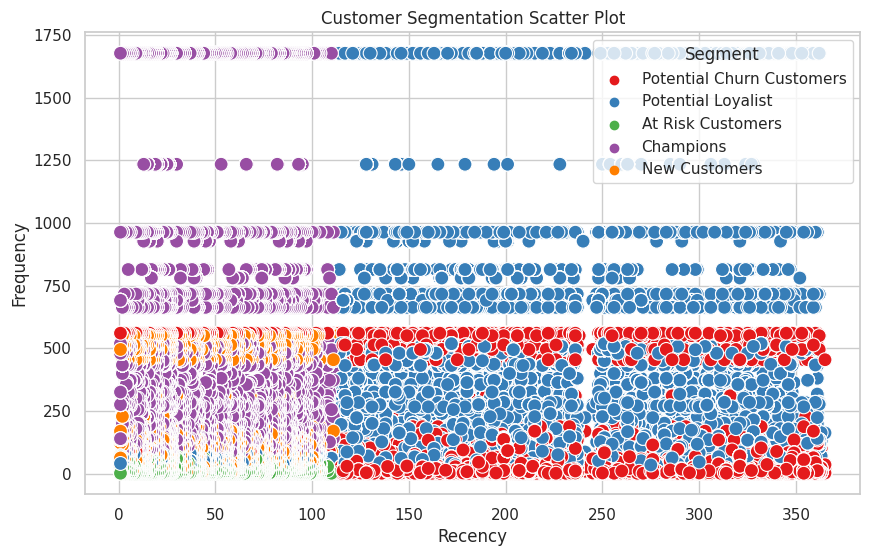

In [ ]:
# Create a scatter plot with color-coding for segments
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Recency',
    y='Frequency',
    hue='Segment',
    data=df,
    palette='Set1',
    s=100,
)
plt.title('Customer Segmentation Scatter Plot')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Segment', loc='upper right')
plt.show()

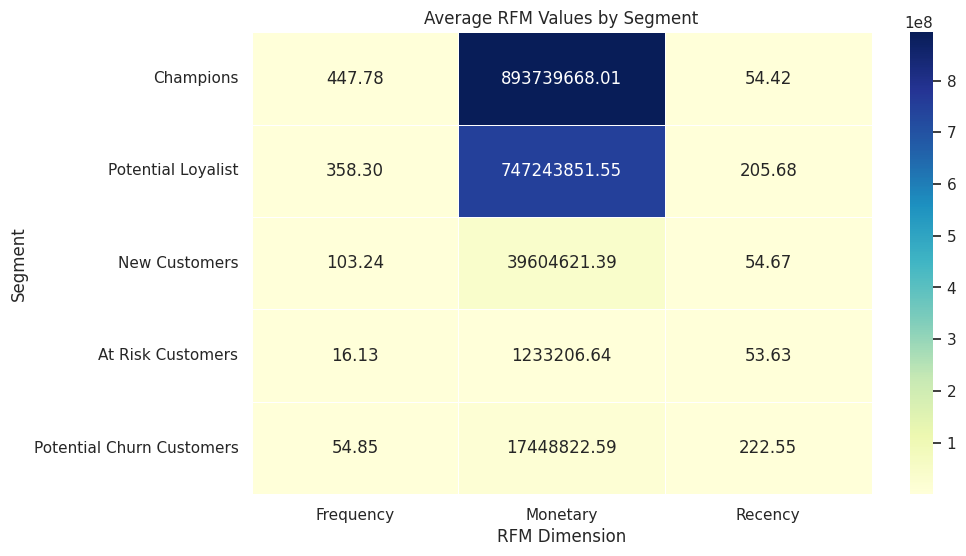

In [ ]:
# Define the desired order of segments
segment_order = [
    'Champions',
    'Potential Loyalist',
    'New Customers',
    'At Risk Customers',
    'Potential Churn Customers'
]

# Reorder the 'Segment' column based on the desired order
df['Segment'] = pd.Categorical(df['Segment'], categories=segment_order, ordered=True)

# Create a pivot table with the reordered segment order
pivot_table = df.pivot_table(
    values=['Recency', 'Frequency', 'Monetary'],
    index='Segment',
    aggfunc='mean'
)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_table,
    annot=True,  # Display values in each cell
    cmap='YlGnBu',  # Choose a color map
    fmt='.2f',  # Format for displaying values
    linewidths=0.5,  # Add linewidths between cells
)
plt.title('Average RFM Values by Segment')
plt.xlabel('RFM Dimension')
plt.ylabel('Segment')
plt.show()

## DESCRIPTIVE ANALYTICS

In [ ]:
df.describe()

,total_project_value,revenue,price_per_item,quantity,price_total,Monetary,Recency,Frequency,Average_Rank
count,105158,105158,105158,105158,105158,105158,105158,105158,105158
mean,5686825,38717,1099171,133,1911994,305198016,156,176,3
std,45413686,151549,22954051,7399,25130283,1141334630,102,305,1
min,0,0,1,0,0,1,1,1,1
25%,112110,840,12500,1,34000,720068,69,14,2
50%,990000,7425,26800,3,100000,20683000,145,48,3
75%,4116852,30876,85000,10,492000,124044180,235,169,4
max,5808713603,14521784,2147480064,1180879,2147483647,11565591594,365,1677,5


# KMEANS

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df.head()

,order_id,buyer_id,transaction_date,order_status,payment_group,payment_method,total_project_value,revenue,seller_category,main_cat,...,free_shipping,price_total,Monetary,Recency,Frequency,Recency_Rank,Frequency_Rank,Monetary_Rank,Average_Rank,Segment
0,22,631a5ca28755a8a989601054,2022-07-05,Selesai,Direct,mps-qris,119275,894,Mikro,Makanan & Minuman,...,False,66250,2626064,180,52,4,3,2,3,Potential Churn Customers
1,22,631a5ca28755a8a989601054,2022-07-05,Selesai,Direct,mps-qris,119275,894,Mikro,Makanan & Minuman,...,False,22500,2626064,180,52,4,3,2,3,Potential Churn Customers
2,38,631a68db7476cace4539fc93,2022-03-18,Selesai,Direct,mps-qris,50000,375,Kecil,Makanan & Minuman,...,True,50000,50000,289,1,5,1,1,2,Potential Churn Customers
3,55,631a54a07255a77e0e6fcc52,2022-08-26,Selesai,Direct,mps-bniva,30192000,226440,Menengah,Elektronik,...,False,27200000,9679735525,128,507,3,5,5,4,Potential Loyalist
4,67,631a5b51aa3096cbda253599,2022-04-23,Selesai,Direct,mandiriva,824175,6181,Mikro,Office & Stationery,...,False,282500,1137500,253,8,4,1,2,2,Potential Churn Customers


In [ ]:
# Select the features for clustering
rfm_data = df[['buyer_id', 'Recency', 'Frequency', 'Monetary']]
rfm_data

,buyer_id,Recency,Frequency,Monetary
0,631a5ca28755a8a989601054,180,52,2626064
1,631a5ca28755a8a989601054,180,52,2626064
2,631a68db7476cace4539fc93,289,1,50000
3,631a54a07255a77e0e6fcc52,128,507,9679735525
4,631a5b51aa3096cbda253599,253,8,1137500
...,...,...,...,...
105153,631a6183aa3096cbda2843e1,1,1,20000
105154,631a796a7476cace4540b0da,1,1677,3447957500
105155,631a55d77255a77e0e700e7d,1,139,153693184
105156,631a55d77255a77e0e700e7d,1,139,153693184


In [ ]:
rfm_data['Recency']

0         180
1         180
2         289
3         128
4         253
         ... 
105153      1
105154      1
105155      1
105156      1
105157      1
Name: Recency, Length: 105158, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'rfm_data' is your DataFrame and 'buyer_id' is the actual categorical column name
categorical_columns = ['buyer_id']

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# Apply one-hot encoding to categorical columns
rfm_data_encoded = preprocessor.fit_transform(rfm_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

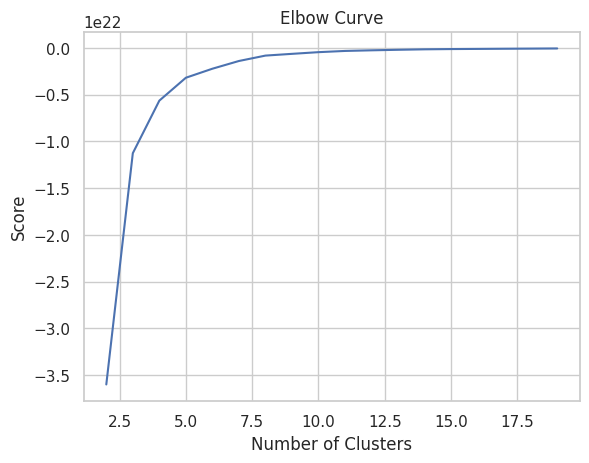

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'rfm_data' is your DataFrame with relevant columns
# Exclude non-numeric columns or handle them appropriately
numeric_data = rfm_data.select_dtypes(include=['int', 'float'])

Nc = range(2, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(numeric_data).score(numeric_data) for i in range(len(kmeans))]

plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
rfm_data['buyer_id'] = rfm_data['buyer_id'].astype('category').cat.codes

<ipython-input-78-c9845824e368>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_data['buyer_id'] = rfm_data['buyer_id'].astype('category').cat.codes


In [ ]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105158 entries, 0 to 105157
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   buyer_id   105158 non-null  int16
 1   Recency    105158 non-null  int64
 2   Frequency  105158 non-null  int64
 3   Monetary   105158 non-null  int64
dtypes: int16(1), int64(3)
memory usage: 2.6 MB


In [ ]:
# Standardize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

# Fit K-means clustering with the chosen K
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Analyze the clusters and segment the customers
cluster_means = df.groupby('Cluster')['Recency', 'Frequency', 'Monetary'].mean()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-80-aced663c5595>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_means = df.groupby('Cluster')['Recency', 'Frequency', 'Monetary'].mean()


In [ ]:
cluster_means

,Recency,Frequency,Monetary
Cluster,,,
0,156,100,81649579
1,156,937,2539093291


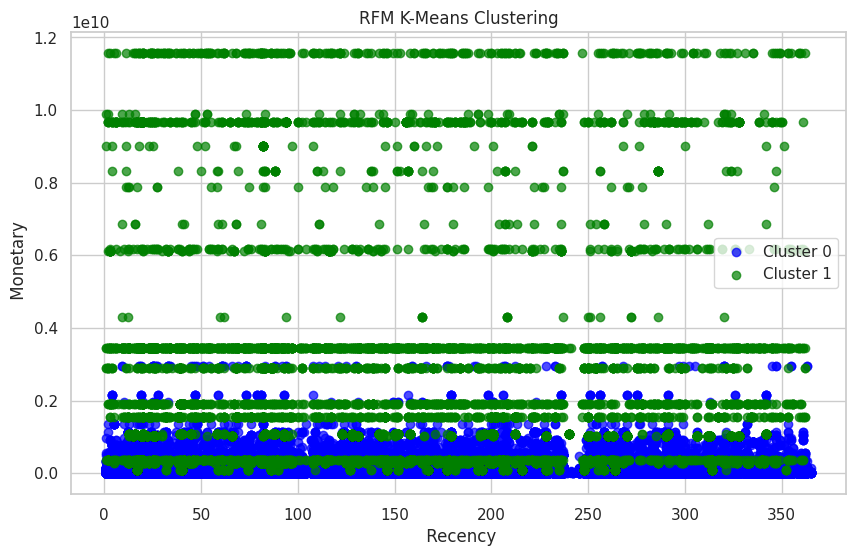

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Create a color map for clusters
cluster_colors = {0: 'blue', 1: 'green'}  # Customize colors as needed

# Plot each data point with cluster-specific color
for cluster_id, color in cluster_colors.items():
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(
        cluster_data['Recency'],
        cluster_data['Monetary'],
        c=color,
        label=f'Cluster {cluster_id}',
        alpha=0.7,  # Adjust transparency
    )

# Add labels and legend
plt.xlabel(' Recency')
plt.ylabel(' Monetary')
plt.title('RFM K-Means Clustering')
plt.legend()

# Show the plot
plt.show()

# Create new variable of cluster

In [ ]:
df['cluster']=kmeans.labels_
df['cluster'].head(10)

0    0
1    0
2    0
3    1
4    0
5    0
6    0
7    0
8    0
9    0
Name: cluster, dtype: int32

In [ ]:
import seaborn as sns

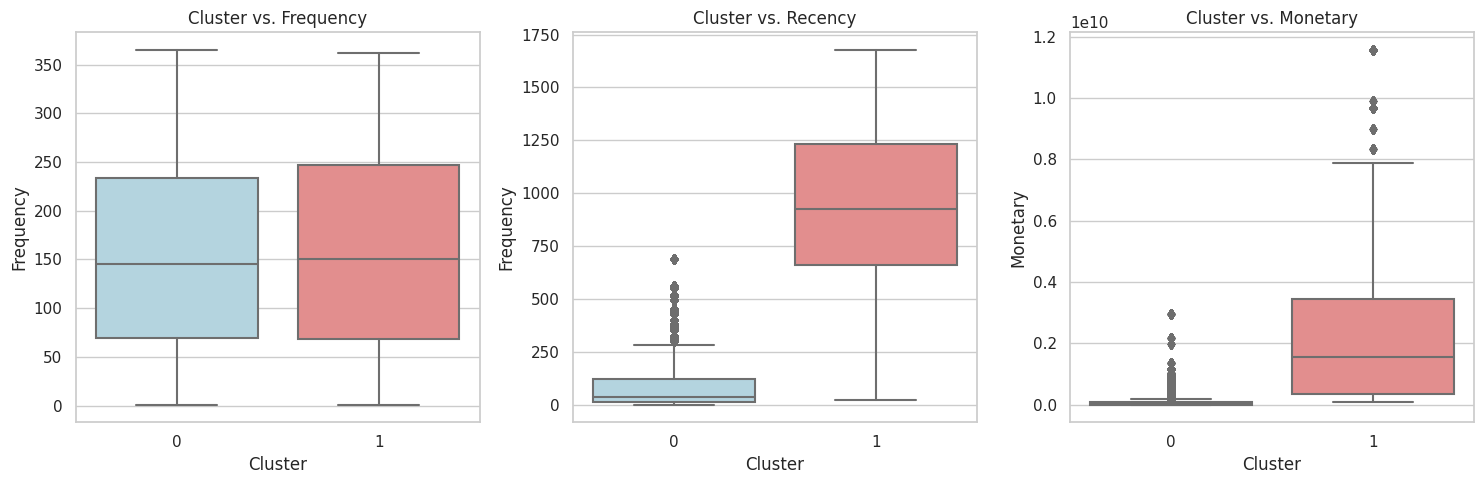

In [ ]:
# Create subplots for boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Custom colors for the bars
colors = ['lightblue', 'lightcoral', 'lightgreen']

# Boxplot of Cluster vs. Recency
sns.boxplot(x='Cluster', y='Recency', data=df, ax=axes[0], palette=colors)
axes[1].set_title('Cluster vs. Recency')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Recency')

# Boxplot of Cluster vs. Frequency
sns.boxplot(x='Cluster', y='Frequency', data=df, ax=axes[1], palette=colors)
axes[0].set_title('Cluster vs. Frequency')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Frequency')

# Boxplot of Cluster vs. Monetary
sns.boxplot(x='Cluster', y='Monetary', data=df, ax=axes[2], palette=colors)
axes[2].set_title('Cluster vs. Monetary')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Monetary')

# Adjust layout
plt.tight_layout()

# Show the boxplots
plt.show()

In [ ]:
rfm_data.describe()

,buyer_id,Recency,Frequency,Monetary
count,105158,105158,105158,105158
mean,3432,156,176,305198016
std,2761,102,305,1141334630
min,0,1,1,1
25%,819,69,14,720068
50%,2544,145,48,20683000
75%,6263,235,169,124044180
max,9226,365,1677,11565591594


In [ ]:
df.to_excel('member_data3.xlsx')